# PyAudio
Record from the computer's microphone.

In [2]:
import pyaudio

In [3]:
chunk = 1024
FORMAT = pyaudio.paInt32
CHANNELS = 1
RATE = 44100
RECORD_SECONDS = 5
WAVE_OUTPUT_FILENAME = "output-sing1.wav"
p = pyaudio.PyAudio()
stream = p.open(format = FORMAT,
    channels = CHANNELS,
    rate = RATE,
    input = True,
    frames_per_buffer = chunk)
all = []
for i in range(0, int(RATE / chunk * RECORD_SECONDS)):
    data = stream.read(chunk)
    all.append(data)
print("* done recording")
stream.close()
p.terminate()

* done recording


Write out the data to a file.

In [4]:
len(data)

4096

In [5]:
import wave
data = b"".join(all)
wf = wave.open(WAVE_OUTPUT_FILENAME, "wb")
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(data)
wf.close()

In [ ]:
!open output-sing1.wav

Plot the amplitude as a function of time.

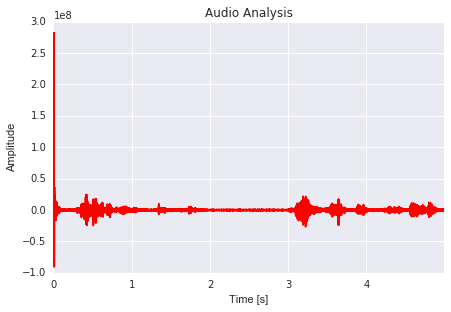

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import *
sns.set()

integer_data = fromstring(data, dtype=np.int32)
time = arange(size(integer_data)) / float(RATE)
plot_title = ("Audio Analysis")

fig = plt.figure(figsize=(7, 4.5))
ax1 = fig.add_subplot(1,1,1)
ax1.plot(time, integer_data, color="red", linestyle="-")
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Amplitude")
ax1.set_xlim(min(time), max(time))
ax1.set_title(plot_title)

Now, let's do it again and analyze the frequency spectrum. Explicit code is unavailable because it is part of your homework.

In [ ]:
run audio_demo.py

In [ ]:
import scipy.io.wavfile
rate, dat = scipy.io.wavfile.read("output-sing.wav", mmap=False)

In [ ]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", context="poster")

Pxx, freqs, bins, im = plt.specgram(dat, NFFT=2048*2, Fs=rate, noverlap=512,
                                cmap=plt.cm.viridis)
plt.ylim(1,18000)
plt.xlabel("Time [sec]")
plt.ylabel("Frequency [Hz]")